In [1]:
from IPython.core.display import display, HTML
import scipy.constants as sc
from scipy.optimize import fsolve
from ipywidgets import interact, widgets
%matplotlib notebook

import numpy as np
import cmath
import matplotlib.pyplot as plt
import scipy.constants as sc
plt.rcParams.update({
    "text.usetex": True,
    'text.latex.preamble': r"\usepackage{amsmath} \boldmath"
})
import os
import h5py

print(os.getpid())
%cd ../

21227
/media/work/docs/codes/QuCF/scripts-py


In [2]:
import plasmapy.dispersion.dispersionfunction as Zpy
from scipy import special

# Zext = lambda z: -np.sqrt(np.pi) * np.exp(-z**2) * (1j - 1j*special.erf(1j*z))  

Zext = lambda z: np.sqrt(np.pi) * np.exp(-z**2) * (1j + 1j*special.erf(1j*z)) 

In [3]:
help(Zpy.plasma_dispersion_func)

Help on function plasma_dispersion_func in module plasmapy.dispersion.dispersionfunction:

plasma_dispersion_func(zeta:Union[complex, int, float, numpy.ndarray]) -> Union[complex, float, numpy.ndarray]
    Calculate the plasma dispersion function.
    
    Parameters
    ----------
    zeta : complex, int, float, ~numpy.ndarray, or ~astropy.units.Quantity
        Argument of plasma dispersion function.
    
    Returns
    -------
    Z : complex, float, or ~numpy.ndarray
        Value of plasma dispersion function.
    
    Raises
    ------
    TypeError
        If the argument is of an invalid type.
    
    ~astropy.units.UnitsError
        If the argument is a `~astropy.units.Quantity` but is not
        dimensionless.
    
    ValueError
        If the argument is not entirely finite.
    
    See Also
    --------
    plasma_dispersion_func_deriv
    
    Notes
    -----
    The plasma dispersion function is defined as:
    
    .. math::
        Z(\zeta) = \pi^{-0.5} \int_{-\in

In [25]:
Zpy.plasma_dispersion_func(0)

1.7724538509055159j

In [31]:
Zext(0)

(-0-1.7724538509055159j)

<IPython.core.display.Javascript object>


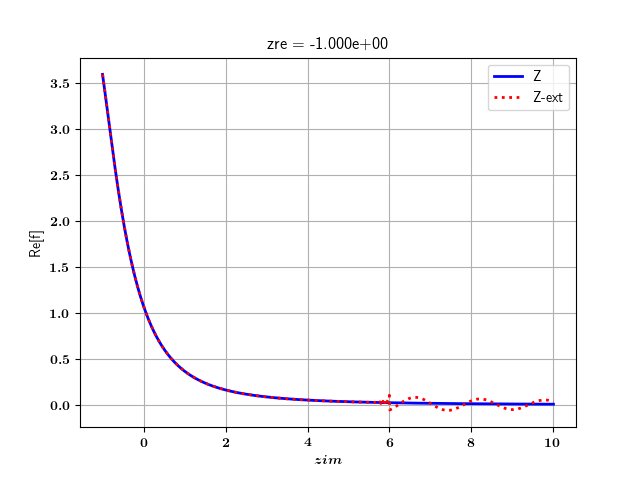

<IPython.core.display.Javascript object>


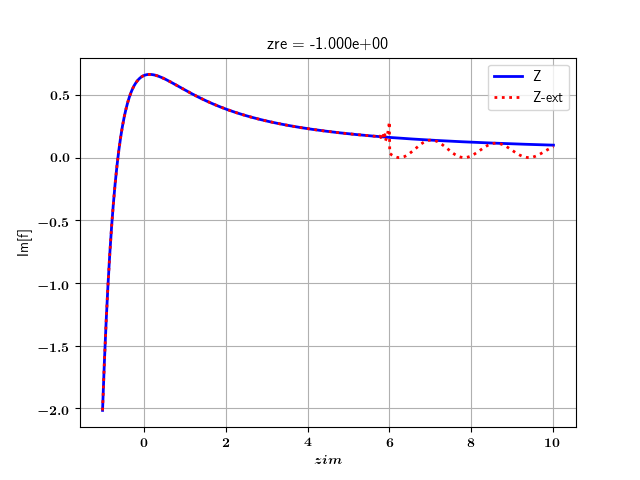

In [4]:
z_re = -1.0
z_im = np.linspace(-1., 10., 1001)
z = z_re + 1j*z_im


fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(
    z_im, np.real(Zpy.plasma_dispersion_func(z)),  
    'b', linewidth = 2, linestyle='-', label="Z"
)
ax.plot(
    z_im, np.real(Zext(z)),  
    'r', linewidth = 2, linestyle=':', label="Z-ext"
)
plt.xlabel('$zim$')
plt.ylabel("Re[f]")
plt.title("z_real = {:0.3e}".format(z_re))
ax.legend()
plt.grid(True)
plt.show()


fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(
    z_im, np.imag(Zpy.plasma_dispersion_func(z)),  
    'b', linewidth = 2, linestyle='-', label="Z"
)
ax.plot(
    z_im, np.imag(Zext(z)),  
    'r', linewidth = 2, linestyle=':', label="Z-ext"
)
plt.xlabel('$zim$')
plt.ylabel("Im[f]")
plt.title("z_imag = {:0.3e}".format(z_re))
ax.legend()
plt.grid(True)
plt.show()

del z_re, z_im, z, fig, ax

<IPython.core.display.Javascript object>


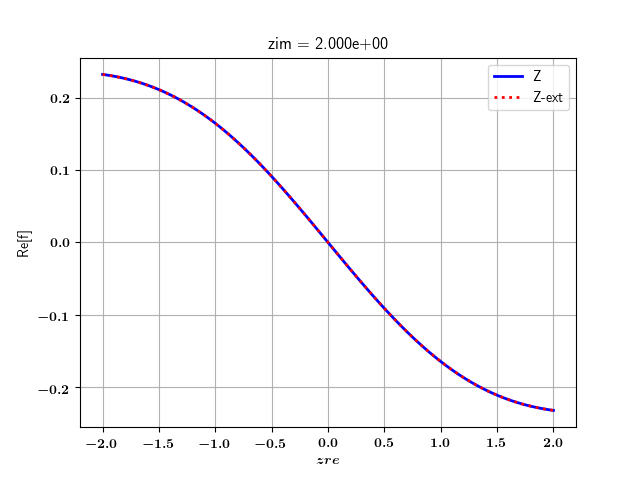

<IPython.core.display.Javascript object>


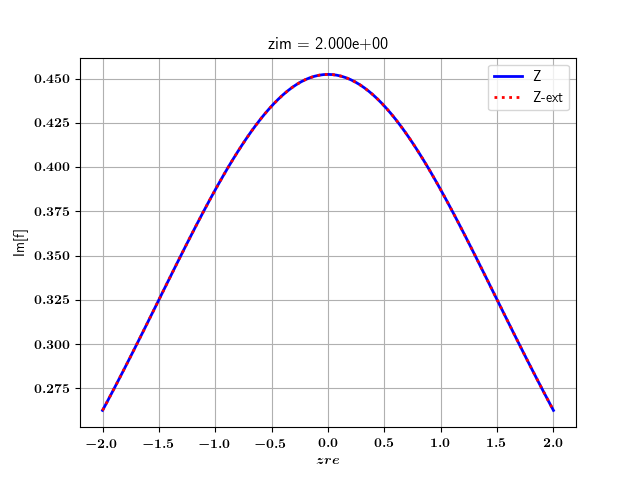

In [5]:
z_re = np.linspace(-2., 2., 101)
z_im = 2.0
z = z_re + 1j*z_im


fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(
    z_re, np.real(Zpy.plasma_dispersion_func(z)),  
    'b', linewidth = 2, linestyle='-', label="Z"
)
ax.plot(
    z_re, np.real(Zext(z)),  
    'r', linewidth = 2, linestyle=':', label="Z-ext"
)
plt.xlabel('$zre$')
plt.ylabel("Re[f]")
plt.title("zim = {:0.3e}".format(z_im))
ax.legend()
plt.grid(True)
plt.show()


fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(
    z_re, np.imag(Zpy.plasma_dispersion_func(z)),  
    'b', linewidth = 2, linestyle='-', label="Z"
)
ax.plot(
    z_re, np.imag(Zext(z)),  
    'r', linewidth = 2, linestyle=':', label="Z-ext"
)
plt.xlabel('$zre$')
plt.ylabel("Im[f]")
plt.title("zim = {:0.3e}".format(z_im))
ax.legend()
plt.grid(True)
plt.show()

<IPython.core.display.Javascript object>


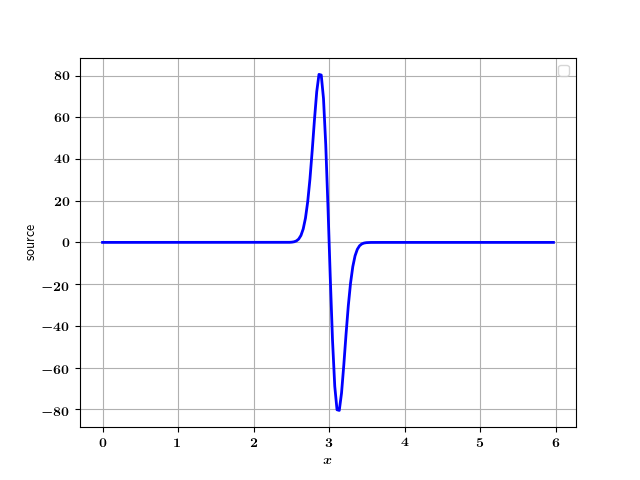

No handles with labels found to put in legend.


In [6]:
# --- Fourier of the UDA-source ---
import scipy.integrate as integrate
from scipy.fft import fft, ifft, fftfreq

Nx = 201
xmax = 6.0
x = np.linspace(0.0, xmax, Nx, endpoint=False)
dx = np.diff(x)[0]

rx = x/xmax

k_fft = fftfreq(Nx, dx)[:Nx//2]

a0 = 100
x0 = 0.5 * xmax
ds = 0.02 * xmax


# f_source_x = np.tanh(a0 * (x - x0)) * np.exp(- pow(x - x0,2)/(2. * pow(ds,2)))
# f_source_x = np.sin(50.0 * 2.0*np.pi*x) + 0.5*np.sin(80.0 * 2.0*np.pi*x)

f_source_x = - (x - x0) / pow(dx,2) * np.exp(- pow(x - x0,2)/(2. * pow(ds,2)))

f_source_k_num = fft(f_source_x)

# --- plot source ---
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(x, f_source_x,'b', linewidth = 2, linestyle='-')
plt.xlabel('$x$')
plt.ylabel("source")
ax.legend()
plt.grid(True)
plt.show()

# # --- plot FFT source ---
# fig = plt.figure()
# ax = fig.add_subplot(111)
# ax.plot(k_fft, 2.0/Nx * np.abs(f_source_k_num[0:Nx//2]),'b', linewidth = 2, linestyle='-')
# # ax.plot(range(Nx), f_source_k_num,'b', linewidth = 2, linestyle='-')
# plt.xlabel('$k$')
# plt.ylabel("source")
# ax.legend()
# plt.grid(True)
# plt.show()

<IPython.core.display.Javascript object>


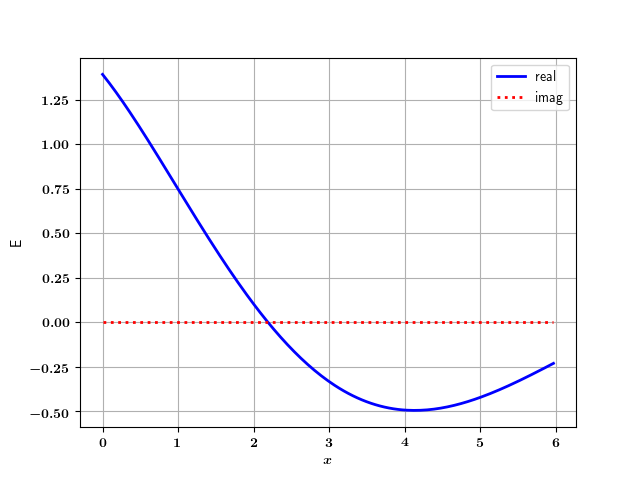

In [8]:
# --- Inverse Fourier ---
Nx = 201
xmax = 6.0
x = np.linspace(0.0, xmax, Nx, endpoint=False)
dx = np.diff(x)[0]

rx = x/xmax

a0 = 100
x0 = 0.5 * xmax
ds = 0.02 * xmax # source width
ws = 1.8   # source frequency


PDFf  = lambda y: Zpy.plasma_dispersion_func(y)

# wk    = lambda k: ws/(np.sqrt(2)*k)
# eps_k = lambda k: 1. + 1./pow(k,2) * ( 1. + wk(k) * PDFf(wk(k)) )
# E_x = np.zeros(Nx, dtype=np.complex)
# for ix in range(len(x)):
#     x1 = x[ix]
#     E_x[ix] = integrate.quad(lambda k: np.exp(1j*k*x1) / (k * eps_k(k)), -40., 40.)

# wk    = ws/(np.sqrt(2)*k)
# eps_k = 1. + 1./pow(k,2) * (1. + wk * PDFf(wk))
# E_x = ifft(f_source_k/eps_k)


k_array_int = np.linspace(-400,400,10000)
wk    = ws/(np.sqrt(2)*k_array_int)
eps_k = 1. + 1./pow(k_array_int,2) * ( 1. + wk * PDFf(wk) )

# here_source_k = np.exp(-1j*k_array_int*x0) / k_array_int
# here_source_k = np.exp(-x0*pow(k_array_int,2) + k_array_int) / k_array_int
here_source_k = -1j * np.exp(-0.5 * pow(k_array_int*ds,2) + 1j * k_array_int * x0) * k_array_int * ds

E_x = np.zeros(Nx, dtype=np.complex)
for ix in range(len(x)):
    x1 = x[ix]
    E_x[ix] = np.trapz(here_source_k * np.exp(1j*k_array_int*x1) / eps_k )


# --- plot resulting electric field ---
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(x, np.real(E_x),'b', linewidth = 2, linestyle='-', label='real')
ax.plot(x, np.imag(E_x),'r', linewidth = 2, linestyle=':', label = 'imag')
plt.xlabel('$x$')
plt.ylabel("E")
ax.legend()
plt.grid(True)
plt.show()